# <font color='violet'> On-line Dashboard For Monitoring of the Health Status of the Students for Prevention of Spread of COVID-19</font>

#### <font color='turquoise'> Designed and Developed By: Dr. Arkaprabha Sau, MBBS, MD (Gold Medalist), Dip. Public Health, Dip. Geriatric Medicine, Ph.D. (Research Fellow-Health Informatics)</font>

## <font color='blue'> Institute Name: ABC</font>

## <font color='blue'> Department: XYZ</font>

## <font color='red'> Today's Date and Time</font>

In [72]:
# Python program to get 
# current date 
# Import date class from datetime module 
from datetime import date 
from datetime import datetime
from datetime import date 
from datetime import timedelta
today = date.today()
today_str = today.strftime("%Y-%m-%d")
yesterday = today - timedelta(days = 1)
yesterday_str = yesterday.strftime("%Y-%m-%d")
daybeforeyesterday = today - timedelta(days = 2)
daybeforeyesterday_str = daybeforeyesterday.strftime("%Y-%m-%d")
# Returns the current local date 
#today = date.today() 
#print("Today date is: ", today)
# returns current date and time 
now = datetime.now() 
print("Today date and Time is = ", now) 

Today date and Time is =  2021-01-02 22:20:10.842522


In [73]:
# Import Relevent libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from pandas.io.json import json_normalize
%matplotlib inline

# Import data from the google sheets
# Client ID: 652877159590-feqk1nllu6u301opj5stk46ogi9p0s0a.apps.googleusercontent.com
# Client Secret: eX7KsJYm25Nzr5PVBsmA0fRJ

## Connect to our service account
scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('/Users/arka.doctor/Python_Code/covid-19-monitoring-298816-dd7230ad1ca6.json', scope)
gc = gspread.authorize(credentials)
spreadsheet_key = '1Os5r6JKH848-8wiw2q6f1X4QIzpmQYhP_otAymsKPJM'
book = gc.open_by_key(spreadsheet_key)
worksheet = book.worksheet("covid19")
table = worksheet.get_all_values()
df = pd.DataFrame(table[1:], columns=table[0])
#Renaming column for better representation
df.columns = ['datetime','score','name','roll','date',
             'temperature','symptopms','comorbidity','containment_zone','international_travel',
             'recent_contact','Aarogyasetu_status','obey_rules','voluntary','age','gender']
# drop the score and date column
df=df.drop(['score','date'],axis=1)
df['datetime'] = pd.to_datetime(df.datetime, format='%m/%d/%Y %H:%M:%S')
df['datetime']=df['datetime'].dt.strftime("%Y-%m-%d")

## <font color='red'> Total Number of Student: 50 </font>
## Number of submission and non-submission today till Now

In [74]:
today_submission=df.loc[df['datetime']==today_str,'roll'].nunique()
print("Total Number of students submitted online form today = ", today_submission) 
yet_to_submit = 50 - today_submission
print("Total Number of students yet to submit online form today = ", yet_to_submit) 

Total Number of students submitted online form today =  50
Total Number of students yet to submit online form today =  0


## Find the roll number of the students yet to submit online from today

In [56]:
df1 = df.loc[df['datetime']==today_str]
submission=df1.loc[df1['datetime'] == today_str, 'roll'].values.flatten().tolist()
submission_list = [int(i) for i in submission]
# No Response on specific date
def find_missing(lst): 
    return [x for x in range(1,51)  
                               if x not in lst] 
missing = find_missing(submission_list)
print("Roll number of the students yet to submit online form today = ", missing) 

Roll number of the students yet to submit online form today =  []


## Number of Students suffering from different COVID Related Symptoms
| Temperature | Symptoms | Co-morbidity |
| --- | --- | --- |
| Fever when temperature >=100 | Cough | Diabetes |
| Warning when temperature >= 98.9 and < 100 | Fever | Hypertension
| Normal when temperature < 98.8 | Difficulty in Breathing | Lung Disease
| | Loss of sense of smell and taste | Heart Disease
| | None of the Above | Kidney Disease
| | | None of the Above

In [61]:
df1['temperature'] = df1['temperature'].astype(str).str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
filter_method = lambda x: 'Fever' if x >= 100 else 'Warning' if (x < 100 and x >= 98.9) else 'Normal'
df1['temperature'] = df1['temperature'].apply(filter_method)

In [71]:
df1['temperature'].value_counts()

Normal     50
Warning     1
Name: temperature, dtype: int64

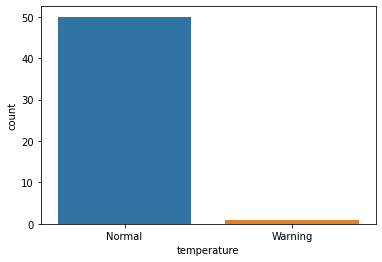

In [65]:
sns.countplot(x='temperature',data=df1)